# Problem

In [1]:
import numpy as np
import matplotlib.pyplot as plt

% matplotlib inline

#training data gerneration
m = 100
x1 = 8*np.random.rand(m, 1)
x2 = 7*np.random.rand(m, 1) - 4

g0 = 0.8*x1 + x2 - 3
g1 = g0 - 1
g2 = g0 + 1

C1 = np.where(g1 >= 0)[0]
C2 = np.where(g2 < 0)[0]
print(C1.shape)
print(C2.shape)

(37,)
(39,)


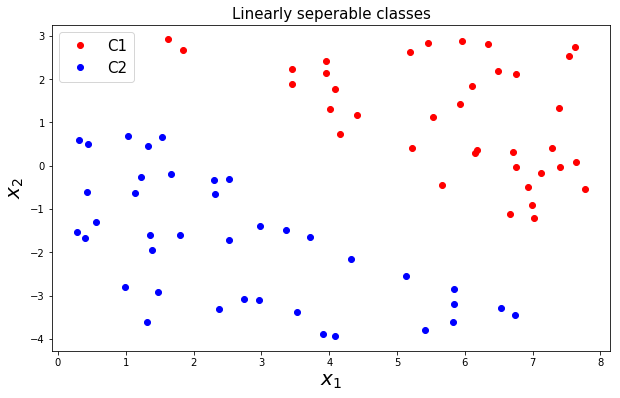

In [2]:
plt.figure(figsize=(10, 6))
plt.plot(x1[C1], x2[C1], 'ro', label='C1')
plt.plot(x1[C2], x2[C2], 'bo', label='C2')
plt.title('Linearly seperable classes', fontsize=15)
plt.legend(loc='upper left', fontsize=15)
plt.xlabel(r'$x_1$', fontsize=20)
plt.ylabel(r'$x_2$', fontsize=20)
plt.show()

# Solution

In [3]:
w = np.array([[0.1, 0.1, 0.1]]).T
print(w.shape)
print(x1.shape)
print(x2.shape)

(3, 1)
(100, 1)
(100, 1)


In [4]:
X1 = np.hstack([x1[C1], x2[C1]])
X2 = np.hstack([x1[C2], x2[C2]])
Y = np.vstack([np.ones([len(C1), 1]), -np.ones([len(C2), 1])])
print(X1.shape)
print(X2.shape)
print(Y.shape)

(37, 2)
(39, 2)
(76, 1)


In [5]:
X = np.vstack([X1, X2])
m = len(C1) + len(C2)
X = np.hstack([X, np.ones([m, 1])])
print(X.shape)

(76, 3)


In [6]:
W = np.matrix(w)
X = np.matrix(X)
Y = np.matrix(Y)
print(W.shape)
print(X.shape)
print(Y.shape)

(3, 1)
(76, 3)
(76, 1)


End iter = 33


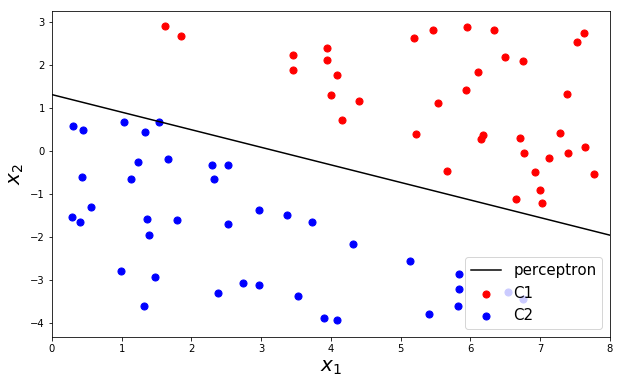

In [7]:
n_iter = 100
for i in range(n_iter):
    diff_idx = np.where(np.sign(X*W) != np.sign(Y))[0]
    W = W + X[diff_idx].T*Y[diff_idx]
    
    if len(diff_idx)==0:
        print("End iter = {}".format(i+1))
        break

x1p = np.linspace(0,8,100).reshape(-1,1)
x2p = - W[0,0]/W[1,0]*x1p - W[2,0]/W[1,0]

plt.figure(figsize=(10, 6))
plt.scatter(x1[C1], x2[C1], c='r', s=50, label='C1')
plt.scatter(x1[C2], x2[C2], c='b', s=50, label='C2')
plt.plot(x1p, x2p, c='k', label='perceptron')
plt.xlim([0,8])
plt.xlabel('$x_1$', fontsize = 20)
plt.ylabel('$x_2$', fontsize = 20)
plt.legend(loc = 4, fontsize = 15)
plt.show()